In [31]:
from numpy import loadtxt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow import keras
from tensorflow.keras import layers,callbacks
import pandas as pd
import numpy as np
import seaborn as sns

# load the dataset
#dataset = loadtxt('anat_qap.csv', delimiter=',')
df = pd.read_csv('anat_qap.csv')
df.head()


,Site_ID,Sub_ID,Session,Series,Unique_ID,CNR,SNR,Qi1,EFC,Smoothness_of_Voxels,FBER,Cortical Contrast
0,ABIDEII-BNI_1,29006,session_1,anat_1,ABIDEII-BNI_1_29006_session_1_anat_1,3.739700,8.044581,0.029466,0.374966,4.444132,1623.309074,0.346157
1,ABIDEII-BNI_1,29007,session_1,anat_1,ABIDEII-BNI_1_29007_session_1_anat_1,3.909783,8.098633,0.027127,0.383418,4.723703,1687.366231,0.345985
2,ABIDEII-BNI_1,29008,session_1,anat_1,ABIDEII-BNI_1_29008_session_1_anat_1,3.539676,8.064538,0.027055,0.355422,4.387167,1568.398781,0.323096
3,ABIDEII-BNI_1,29009,session_1,anat_1,ABIDEII-BNI_1_29009_session_1_anat_1,4.340816,9.175651,0.022776,0.370577,4.325262,2212.091689,0.349804
4,ABIDEII-BNI_1,29010,session_1,anat_1,ABIDEII-BNI_1_29010_session_1_anat_1,4.287266,8.598315,0.041394,0.361352,4.494184,1389.710795,0.341943


In [32]:
df.describe()

,Sub_ID,CNR,SNR,Qi1,EFC,Smoothness_of_Voxels,FBER,Cortical Contrast
count,1359.000000,1359.000000,1359.000000,1359.000000,1359.000000,1359.000000,1359.000000,1359.000000
mean,30381.351729,8.624573,17.312411,0.143365,0.457526,3.508779,803.468846,0.372319
std,4980.291356,3.475447,5.118927,0.084468,0.075750,0.713982,687.718680,0.059650
min,28675.000000,2.774116,5.890210,0.015219,0.300929,2.404120,37.017187,0.219213
25%,28783.500000,6.313351,12.961524,0.073635,0.404586,2.917023,225.098971,0.342812
50%,29159.000000,8.370893,17.136217,0.123411,0.446699,3.305354,575.045085,0.366492
75%,29532.500000,10.197203,20.939911,0.197912,0.500247,4.012787,1271.582810,0.393775
max,51315.000000,33.555915,31.212256,0.469157,0.715488,6.879572,3928.347851,0.954482


In [33]:
#Checking for null values to fill
print("Number of null values:")
print(df.isnull().sum())

Number of null values:
Site_ID                 0
Sub_ID                  0
Session                 0
Series                  0
Unique_ID               0
CNR                     0
SNR                     0
Qi1                     0
EFC                     0
Smoothness_of_Voxels    0
FBER                    0
Cortical Contrast       0
dtype: int64


In [34]:
#Checking number of unique values and wrong entries like symbols -,?,#,*,etc.
for col in df.columns:
    print('{} : {}'.format(col,df[col].unique()))

Site_ID : ['ABIDEII-BNI_1' 'ABIDEII-EMC_1' 'ABIDEII-ETH_1' 'ABIDEII-GU_1'
 'ABIDEII-IP_1' 'ABIDEII-IU_1' 'ABIDEII-KKI_1' 'ABIDEII-KUL_3'
 'ABIDEII-NYU_1' 'ABIDEII-NYU_2' 'ABIDEII-OHSU_1' 'ABIDEII-ONRC_2'
 'ABIDEII-SDSU_1' 'ABIDEII-TCD_1' 'ABIDEII-UCD_1' 'ABIDEII-UCLA_1'
 'ABIDEII-USM_1' 'ABIDEII-UCLA_Long' 'ABIDEII-UPSM_Long']
Sub_ID : [29006 29007 29008 ... 50049 50050 50051]
Session : ['session_1' 'session_2' 'baseline' 'followup_1' 'followup_2']
Series : ['anat_1' 'anat_2' 'anat_5' 'anat_4' 'anat_3' 'anat_6']
Unique_ID : ['ABIDEII-BNI_1_29006_session_1_anat_1'
 'ABIDEII-BNI_1_29007_session_1_anat_1'
 'ABIDEII-BNI_1_29008_session_1_anat_1' ...
 'ABIDEII-UPSM_Long_50050_followup_1_anat_1'
 'ABIDEII-UPSM_Long_50051_baseline_anat_1'
 'ABIDEII-UPSM_Long_50051_followup_1_anat_1']
CNR : [ 3.73970045  3.90978313  3.53967578 ... 10.18313466 10.64652799
 11.77854207]
SNR : [ 8.04458085  8.09863259  8.06453778 ... 19.97628414 18.94514539
 20.56350119]
Qi1 : [0.02946565 0.02712723 0.02705517 ..

<AxesSubplot:xlabel='CNR', ylabel='Count'>

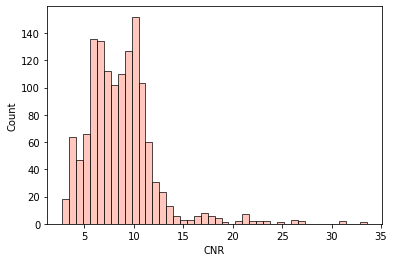

In [35]:
#Histogram of Age distrbution
sns.histplot(data=df,x='CNR',color="#ffb5a7")

<AxesSubplot:>

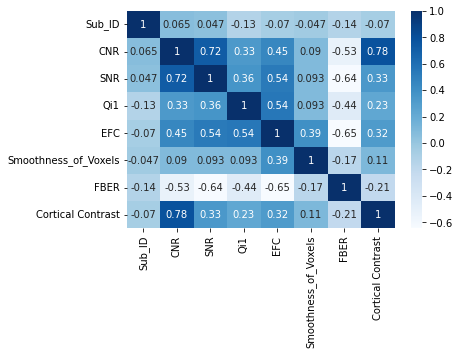

In [36]:
#Relationship analysis
sns.heatmap(df.corr(),cbar=True, annot=True, cmap='Blues')

In [37]:
# split into input (X) and output (y) variables
X=df[['CNR','SNR','Qi1','EFC','Smoothness_of_Voxels','FBER']]
y=df['Cortical Contrast']

In [38]:
# define the keras model
model = Sequential()
model.add(Dense(12, input_shape=(8,), activation='relu'))
model.add(Dense(8, activation='relu'))
model.add(Dense(1, activation='sigmoid'))